<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/3_0_KNeighbors_%26_LinearRegressor_PerchWeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Classification vs. Regression***

classification : divide into classes and predict where the data is belong to the classes.

regression : predict the specific value from the data. (no specific class, return values)

***KNeighborsRegressor : Find nearest n neighbors and find their mean values.***

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


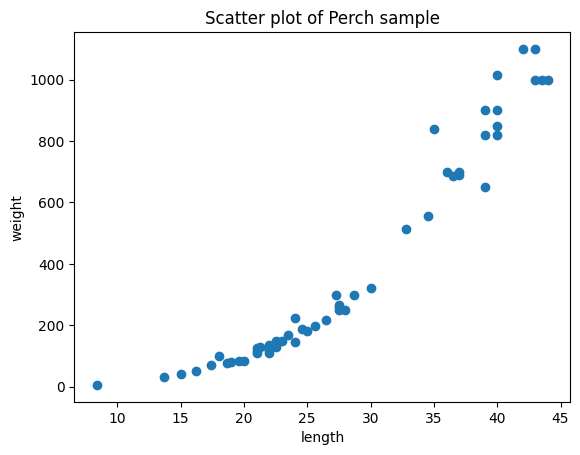

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Scatter plot of Perch sample')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)


*To train model in sklearn, the set must be in 2d dimension. The perch_length is 1d dimension, so we have to reshape the data to 2d dimension using **reshape(row,column)** method.*

tuple : [1 ,2 ,3] (3,) \
\>>>reshape>>> \
[[1],\
[2],\
[3]] (3x1)

In [ ]:
print(train_input.shape)
train_input = train_input.reshape(42,1)
#OR
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
#-1 means the number of remaining elements >> 42
print(train_input.shape)
print(test_input.shape)

(42,)
(42, 1)
(14, 1)


***TRAINING MODEL***

Coefficient of Determination or R^2 >> score of prediction closer to 1 >> less error

r^2 = (sum of (target - prediction)^2)/(sum of (target - mean)^2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))


0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict((test_input))

mae = mean_absolute_error(test_target, test_prediction)
print(mae)
#mean_absolute_error for test set
#결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다.

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


***OVERFITTING VS. UNDERFITTING***

훈련 세트와 테스트 세트의 점수를 비교했을 때 훈련 세트가 너무 높으면 과대적합, 그 반대이거나 두 점수가 모두 낮으면 과소적합.

reason for underfitting \
1. too small number of samples of trainig and test sets.

>>>>

solution for underfitting \
Make the model more complicate.
lower the number of n, number of nearest data. 5 >> 3 \
 \
 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따름.

In [ ]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609


***Limitation of KNeighbors*** \

Because KNeighbors get the mean values of nearest neighbors,
if the predicting data is too large compared to training data, predicted data shows error


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input,train_target)

print(knr.predict([[50]]))

[1033.33333333]


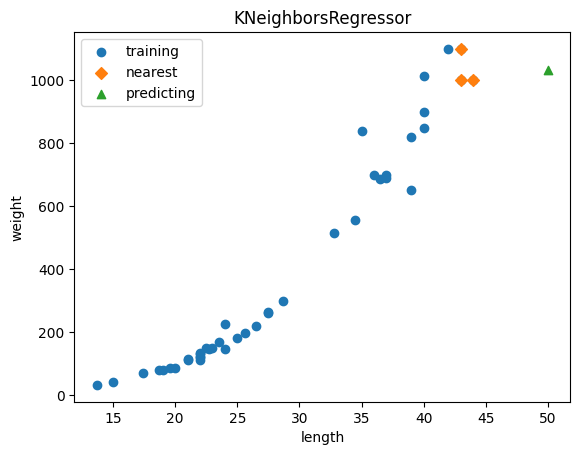

1033.3333333333333


In [ ]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, knr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['training', 'nearest', 'predicting'])
plt.title('KNeighborsRegressor')
plt.show()
print(np.mean(train_target[indexes]))

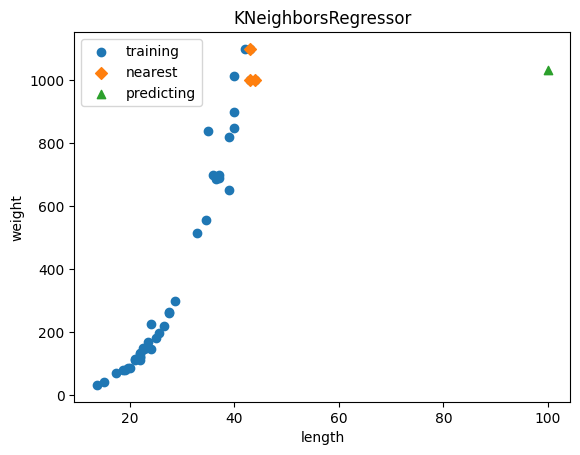

1033.3333333333333


In [ ]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, knr.predict([[100]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['training', 'nearest', 'predicting'])
plt.title('KNeighborsRegressor')
plt.show()
print(np.mean(train_target[indexes]))
#Because KNeighbors get the mean values of nearest neighbors,
#if the predicting data is too large compared to training data, predicted data shows error


***Linear Regression*** \

Learning a linear line that have the features of data
\
\
y = a * x + b \
x = length \
y = weight \

print(lr.coef_, lr.intercept_) : Model Parameter

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


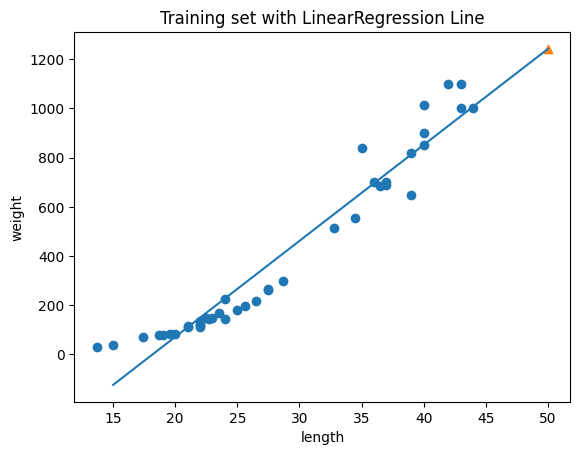

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Training set with LinearRegression Line')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
#Overfitting? Underfitting? maybe both?

0.939846333997604
0.8247503123313558


***Polynomial Regression (Linear)*** \

The samples must have squared length data to create curved line. >> numpy [squared length] [length] \
\
***weight = a * length^2 + b * length + c***

In [ ]:
print(train_input.shape)
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape)
print(test_poly.shape)

(42, 1)
(42, 2)
(14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


***Weight = 1.01 * length^2 - 21.6 * length + 116.05***

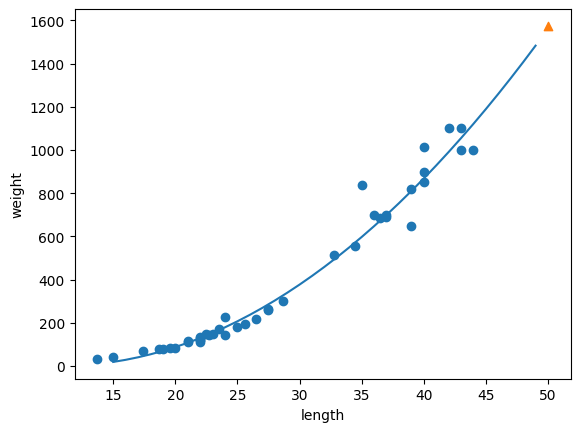

0.9706807451768623
0.9775935108325122


In [ ]:
point = np.arange(15, 50) #구간별 직선을 그리기위한 정수 배열
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#The test set score is slightly larget than train set score >> Underfitting


***Polynomial Features & Multiple Regression*** \

Linear Regression brings ***better performance*** with more and ***more features*** : length, height, thickness \

1개의 특성 >> 직선 선형 회귀 모델 \
2개의 특성 >> 평면 선형 회귀 모델 \

: \
: \
target = a * feature1 + b * feature2 + intercept

***Feature Engineering*** \
농어 길이 * 농어 높이 >> new feature, not in the list

In [ ]:
import numpy as np
#target
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
import pandas as pd
#input
df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df)
perch_full = df.to_numpy()
print(perch_full) #length #height #width

    length   height   width
0      8.4     2.11    1.41
1     13.7     3.53    2.00
2     15.0     3.82    2.43
3     16.2     4.59    2.63
4     17.4     4.59    2.94
5     18.0     5.22    3.32
6     18.7     5.20    3.12
7     19.0     5.64    3.05
8     19.6     5.14    3.04
9     20.0     5.08    2.77
10    21.0     5.69    3.56
11    21.0     5.92    3.31
12    21.0     5.69    3.67
13    21.3     6.38    3.53
14    22.0     6.11    3.41
15    22.0     5.64    3.52
16    22.0     6.11    3.52
17    22.0     5.88    3.52
18    22.0     5.52    4.00
19    22.5     5.86    3.62
20    22.5     6.79    3.62
21    22.7     5.95    3.63
22    23.0     5.22    3.63
23    23.5     6.28    3.72
24    24.0     7.29    3.72
25    24.0     6.38    3.82
26    24.6     6.73    4.17
27    25.0     6.44    3.68
28    25.6     6.56    4.24
29    26.5     7.17    4.14
30    27.3     8.32    5.14
31    27.5     7.17    4.34
32    27.5     7.05    4.34
33    27.5     7.28    4.57
34    28.0     7.82 

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split \
 (perch_full, perch_weight, random_state = 42)


***Transformer*** \
fit을 해야 transform 가능. 사이킷런의 일관된 api 때문에 두 단계로 나뉘어져 있다. 두 메서드를 하나로 붙인 fit_transform 메서드도 있다. \
**fit() >> 새롭게 만들 특성 조합을 찾는다** \

**transform() >> 실제로 데이터를 변환.** \
**each feature, squared features, multiples of each features** \

ex) [2 3] 이 [1 2 3 4 6 9]로 바뀜. \

Where 1 comes from? >> intercept = feature as 1 * d >>>>> ***features = (length, height, width, 1)***

weight = a * length + b * height + c * width + d * 1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
poly = PolynomialFeatures(include_bias=False) #exclude feature 1, sklearn linear regressor
#automatically include intercept >> we don't need 1 in our input data
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))


[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names_out() #x0 : first feature, x1 : second feature ...

test_poly = poly.transform(test_input) #why not fit() with test_poly??
#Always transrom test set with the pattern and features of train set: so we can get consistent output.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 9)
0.9903183436982125
0.9714559911594111


***Training set with polynomial features***

more and more degree terms, more and more complex model >> TOO MUCH overfitting >> we need ***Regularization***

In [ ]:
#more degrees >> 5
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999996433
-144.40579436844948


***Regularization*** \

머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것. >> prevent overfitting >> for linearregression, decrease the the degree or slope \

Before regularization, we have to scale the features to apply standardized regulation. >>>>>>>>> ***StandardScaler class***. >>>>>>>>> ***Regularization(ridge or lasso)*** \
***ridge*** : 계수를 제곱한 값을 기준으로 규제를 적용 \
***lasso*** : 계수의 절댓값을 기준으로 규제 \

Ridge is prefered commonly.


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
#scale with ss that fitted with training set!!!!

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


***Alpha*** \

alpha parameter regulate the strength of regularization. \

Smaller alpha >> less strength regularization >> overfitting \

Bigger alpha >> more strength regularization >> underfitting \

***How to set alpha?*** \

alpha 값에 대한 r^2 값의 그래프를 그린다. >> 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값.


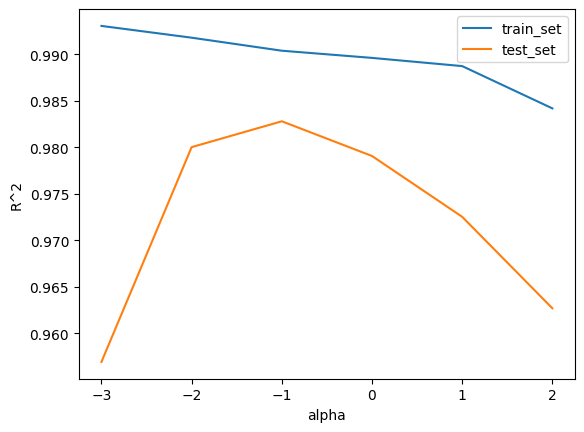

0.9903815817570367
0.9827976465386928


In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

#alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음,
#훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

#alpha 값을 0.001부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 그래프 왼쪽이 너무 촘촘해짐.
#alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현.
#0.001 >> -3
#0.01 >> -2
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_set', 'test_set'])
plt.show()
#at alpha -1 (0.1), the score of train set and test set are the closest. >> alpha = 0.1

ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

***Lasso*** \

follow the same process as ridge. \
lasso model sometimes set 0 for some coefficients. >> we can use it to sort out useful features from the set.

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

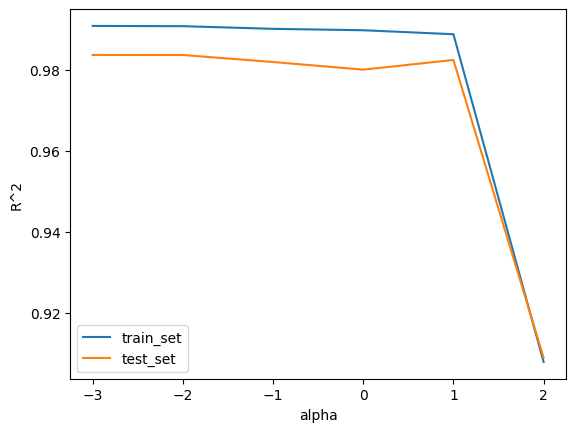

0.9888067471131867
0.9824470598706695
[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
40


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_set', 'test_set'])
plt.show()
#best alpha = 10

lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

#the coefficients of lasso model is stored in coef_
print(lasso.coef_)
print(np.sum(lasso.coef_ == 0)) #return number of 0 넘파이 배열에 비교 연산자를 사용했을 대 각 원소는 True or False로 됨.
#55개의 features 중에 40개가 무의미 (we don't need them)